In [1]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

In [2]:
nlp = spacy.load('en_core_web_md')
nlp.add_pipe('spacytextblob')

/Users/zyankarim/miniconda3/envs/npl/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# load in two "happy" songs and two "sad" songs

# Blue Skies by Frank Sinatra
blue_skies = nlp(
    "Blue skies, smiling at me \
    Nothing but blue skies do I see \
    Blue days, all of them gone \
    Nothing but blue skies from now on \
    Never saw the sun shining so bright \
    Never saw things looking so right \
    Noticing the days hurrying by \
    When you're in love, my how they fly like \
    Bluebirds singing a song \
    Nothing but bluebirds all day long \
    Blue skies, smiling at me \
    Nothing but blue skies do I see \
    Blue days, all of them gone \
    Nothing but blue skies from now on"
)

# What a Wonderful World by Louis Armstrong
wond_world = nlp(
    "I see trees of green \
    Red roses too \
    I see them bloom \
    For me and you \
    And I think to myself \
    What a wonderful world \
    I see skies of blue \
    And clouds of white \
    The bright blessed day \
    The dark sacred night \
    And I think to myself \
    What a wonderful world \
    The colors of the rainbow \
    So pretty in the sky \
    Are also on the faces \
    Of people going by \
    I see friends shaking hands \
    Saying, \"How do you do?\" \
    They\'re really saying \
    I love you \
    I hear babies cry \
    I watch them grow \
    They\'ll learn much more \
    Than I\'ll ever know \
    And I think to myself \
    What a wonderful world \
    Yes, I think to myself \
    What a wonderful world \
    Ooh, yes"
)

# The Sound of Silence by Simon and Garfunkel
silence = nlp(
    "Hello darkness, my old friend \
    I\'ve come to talk with you again \
    Because a vision softly creeping \
    Left its seeds while I was sleeping \
    And the vision that was planted in my brain \
    Still remains \
    Within the sound of silence \
    In restless dreams I walked alone \
    Narrow streets of cobblestone \
    \'Neath the halo of a street lamp \
    I turned my collar to the cold and damp \
    When my eyes were stabbed by the flash of a neon light \
    That split the night \
    And touched the sound of silence \
    And in the naked light I saw \
    Ten thousand people, maybe more \
    People talking without speaking \
    People hearing without listening \
    People writing songs that voices never share \
    No one dared \
    Disturb the sound of silence \
    \"Fools\" said I, \"You do not know \
    Silence like a cancer grows \
    Hear my words that I might teach you \
    Take my arms that I might reach you\" \
    But my words like silent raindrops fell \
    And echoed in the wells of silence \
    And the people bowed and prayed \
    To the neon god they made \
    And the sign flashed out its warning \
    In the words that it was forming \
    And the sign said, \"The words of the prophets \
    Are written on the subway walls \
    And tenement halls \
    And whispered in the sounds of silence\" "
)

# Mad World by Tears for Fears
mad_world = nlp(
    "All around me are familiar faces \
    Worn out places, worn out faces \
    Bright and early for their daily races \
    Going nowhere, going nowhere \
    Their tears are filling up their glasses \
    No expression, no expression \
    Hide my head I want to drown my sorrow \
    No tomorrow, no tomorrow \
    And I find it kind of funny \
    I find it kind of sad \
    The dreams in which I\'m dying are the best I\'ve ever had \
    I find it hard to tell you \'cause I find it hard to take \
    When people run in circles it\'s a very, very \
    Mad world \
    Mad world \
    Mad world \
    Mad world \
    Children waiting for the day they feel good \
    Happy birthday, happy birthday \
    Made to feel the way that every child should \
    Sit and listen, sit and listen \
    Went to school and I was very nervous \
    No one knew me, no one knew me \
    Hello teacher tell me what's my lesson \
    Look right through me, look right through me \
    And I find it kind of funny \
    I find it kind of sad \
    The dreams in which I'm dying are the best I've ever had \
    I find it hard to tell you 'cause I find it hard to take \
    When people run in circles it\'s a very, very \
    Mad world \
    Mad world \
    Mad world \
    Mad world \
    And I find it kind of funny \
    I find it kind of sad \
    The dreams in which I\'m dying are the best I\'ve ever had \
    I find it hard to tell you \'cause I find it hard to take \
    When people run in circles it\'s a very, very \
    Mad world \
    Mad world \
    Halargian world \
    Mad world"
)

In [4]:
songs = [
    blue_skies,
    wond_world,
    silence,
    mad_world
]

In [5]:
# from numpy import dot

def sem_distance(vec1, vec2):
    dist = 0
    for v1, v2 in zip(vec1, vec2):
        dist += (v1 - v2)**2
    
    return dist

# take a list of song doc objects and convert it into a similarity "tensor"
def similarity_tensor(target, songs):
    tensor = []
    t_semantics = [target._.polarity, target._.subjectivity]
    for song in songs:
        s_semantics = [song._.polarity, song._.subjectivity]
        vec = [
            (1 - target.similarity(song)), # difference score
            sem_distance(t_semantics, s_semantics) # semantic distance
        ]
        tensor.append(vec)

    return tensor

In [6]:
sim_tensor = similarity_tensor(blue_skies, songs)
sim_tensor

[[0.0, 0.0],
 [0.10570143066012849, 0.1231508875739645],
 [0.12070473164652396, 0.008709168578674069],
 [0.10263251450724031, 0.22904087312240962]]

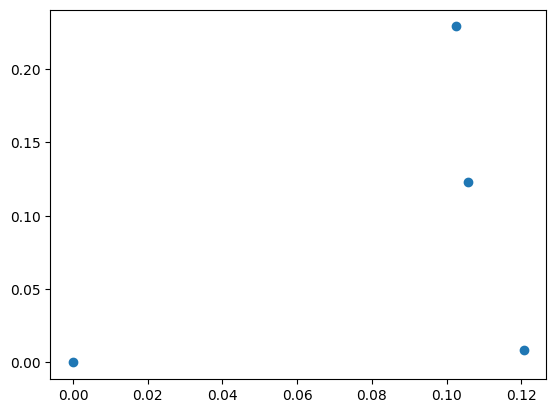

In [12]:
import matplotlib.pyplot as plt
import numpy as np

points = np.array(sim_tensor)
x = points[:, 0]
y = points[:, 1]

plt.scatter(x, y)